In [17]:
import pandas as pd

file_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\fortune_500_stock_data\Blackstone.csv"

df = pd.read_csv(file_path)

print(df.head())
print(df.info())


         Date                Open                High                 Low  \
0         NaN                  BX                  BX                  BX   
1  2015-01-02   33.34641647338867  33.631011962890625   33.09126663208008   
2  2015-01-05   33.24828338623047    33.4249267578125   32.53189468383789   
3  2015-01-06  33.081451416015625   33.12070846557617  31.756624221801758   
4  2015-01-07   32.67909622192383    33.0225715637207   32.38468933105469   

                Close      Adjusted_Close   Volume  
0                  BX                  BX       BX  
1  33.493621826171875   19.62444496154785  2626167  
2   33.00294494628906  19.336946487426758  3072693  
3   32.36506271362305   18.96320343017578  3417930  
4   32.82630157470703  19.233455657958984  2565231  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2765

In [18]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)


In [19]:
for col in df.columns:
    print(col, df[col].unique()[:5])


date [nan '2015-01-02' '2015-01-05' '2015-01-06' '2015-01-07']
open ['BX' '33.34641647338867' '33.24828338623047' '33.081451416015625'
 '32.67909622192383']
high ['BX' '33.631011962890625' '33.4249267578125' '33.12070846557617'
 '33.0225715637207']
low ['BX' '33.09126663208008' '32.53189468383789' '31.756624221801758'
 '32.38468933105469']
close ['BX' '33.493621826171875' '33.00294494628906' '32.36506271362305'
 '32.82630157470703']
adjusted_close ['BX' '19.62444496154785' '19.336946487426758' '18.96320343017578'
 '19.233455657958984']
volume ['BX' '2626167' '3072693' '3417930' '2565231']


In [20]:
# Drop the first row which contains 'BX' and other header-like values
df = df.iloc[1:].reset_index(drop=True)


In [21]:
numeric_cols = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume']

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace("$", "")
        .astype(float)
    )


In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [8]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2765 non-null   datetime64[ns]
 1   open            2765 non-null   float64       
 2   high            2765 non-null   float64       
 3   low             2765 non-null   float64       
 4   close           2765 non-null   float64       
 5   adjusted_close  2765 non-null   float64       
 6   volume          2765 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.3 KB


In [23]:
df['daily_return'] = df['close'].pct_change()


In [24]:
df['volatility_20'] = df['daily_return'].rolling(20).std()


In [25]:
df['ma_20'] = df['close'].rolling(20).mean()
df['ma_50'] = df['close'].rolling(50).mean()


In [26]:
delta = df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['rsi_14'] = 100 - (100 / (1 + rs))


In [27]:
df['volume_ma_20'] = df['volume'].rolling(20).mean()
df['volume_spike'] = df['volume'] > (df['volume_ma_20'] * 1.5)


In [28]:
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'daily_return', 'volatility_20', 'ma_20', 'ma_50', 'rsi_14',
       'volume_ma_20', 'volume_spike'],
      dtype='object')

In [29]:
df.head()


,date,open,high,low,close,adjusted_close,volume,daily_return,volatility_20,ma_20,ma_50,rsi_14,volume_ma_20,volume_spike
0,2015-01-02,33.346416,33.631012,33.091267,33.493622,19.624445,2626167.0,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2015-01-05,33.248283,33.424927,32.531895,33.002945,19.336946,3072693.0,-0.014650,NaN,NaN,NaN,NaN,NaN,False
2,2015-01-06,33.081451,33.120708,31.756624,32.365063,18.963203,3417930.0,-0.019328,NaN,NaN,NaN,NaN,NaN,False
3,2015-01-07,32.679096,33.022572,32.384689,32.826302,19.233456,2565231.0,0.014251,NaN,NaN,NaN,NaN,NaN,False
4,2015-01-08,33.169773,33.287537,32.983318,33.081451,19.382940,3589937.0,0.007773,NaN,NaN,NaN,NaN,NaN,False


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
sns.set_palette("viridis")


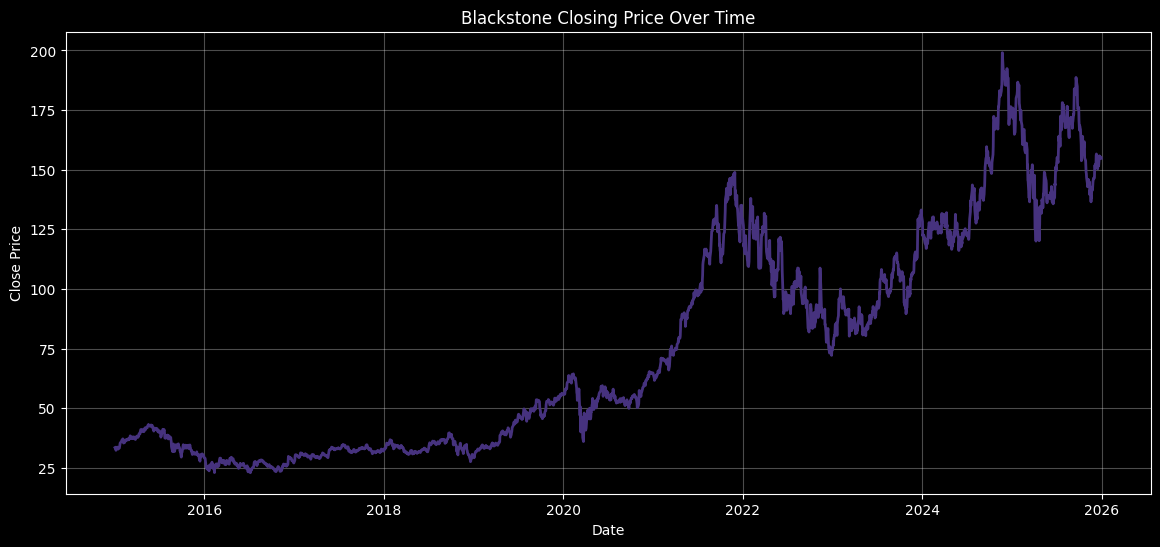

In [31]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], linewidth=2)
plt.title("Blackstone Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(alpha=0.3)
plt.show()


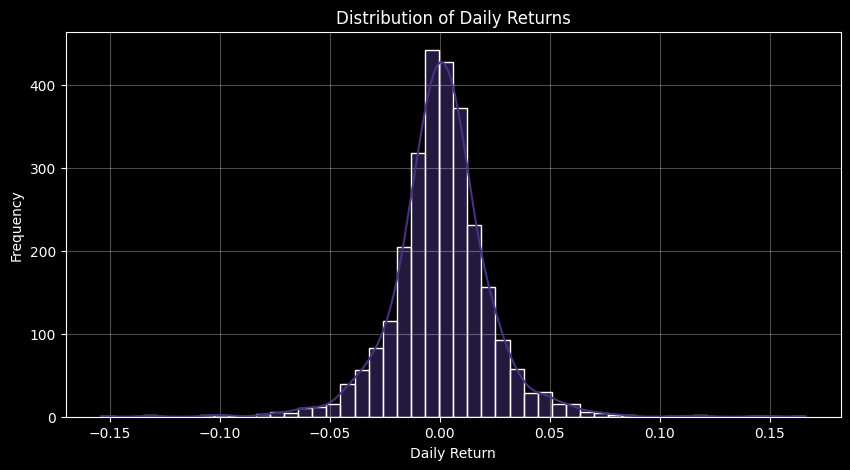

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


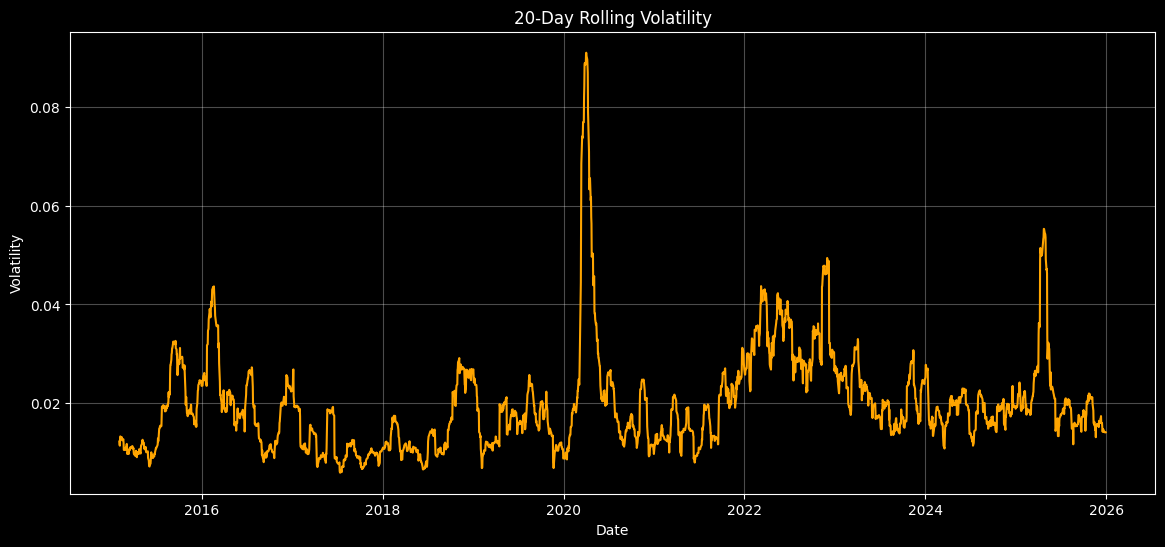

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['volatility_20'], color='orange')
plt.title("20‑Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()


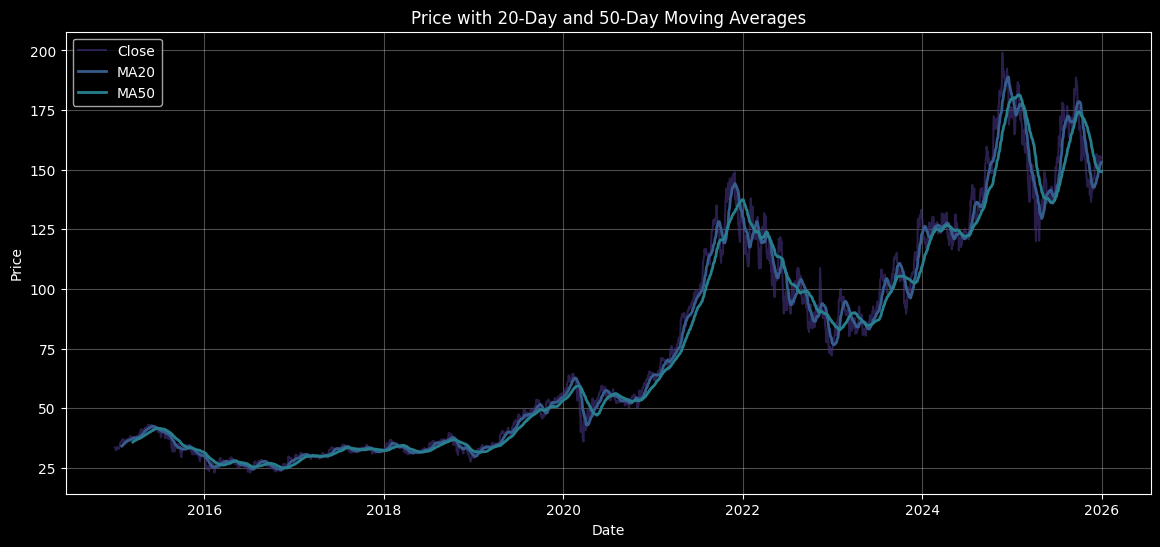

In [34]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], label='Close', alpha=0.6)
plt.plot(df['date'], df['ma_20'], label='MA20', linewidth=2)
plt.plot(df['date'], df['ma_50'], label='MA50', linewidth=2)
plt.title("Price with 20‑Day and 50‑Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


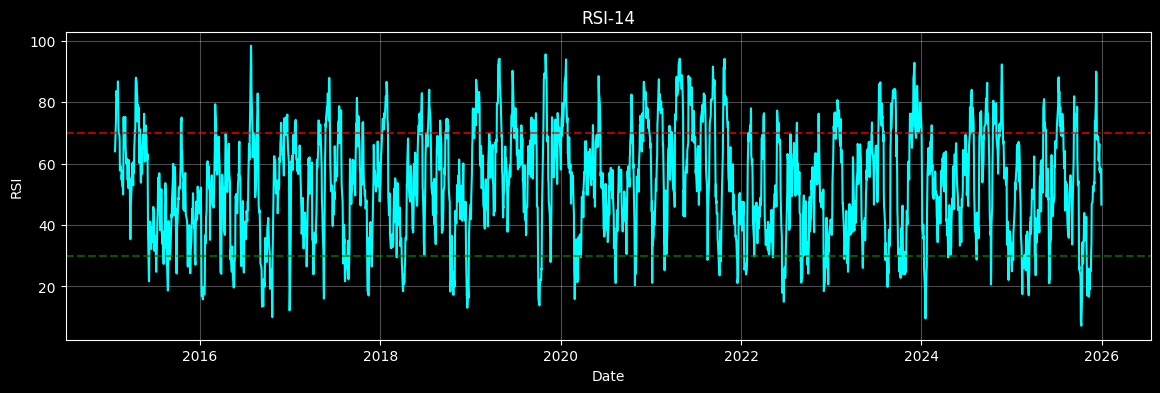

In [35]:
plt.figure(figsize=(14,4))
plt.plot(df['date'], df['rsi_14'], color='cyan')
plt.axhline(70, color='red', linestyle='--', alpha=0.7)
plt.axhline(30, color='green', linestyle='--', alpha=0.7)
plt.title("RSI‑14")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.grid(alpha=0.3)
plt.show()


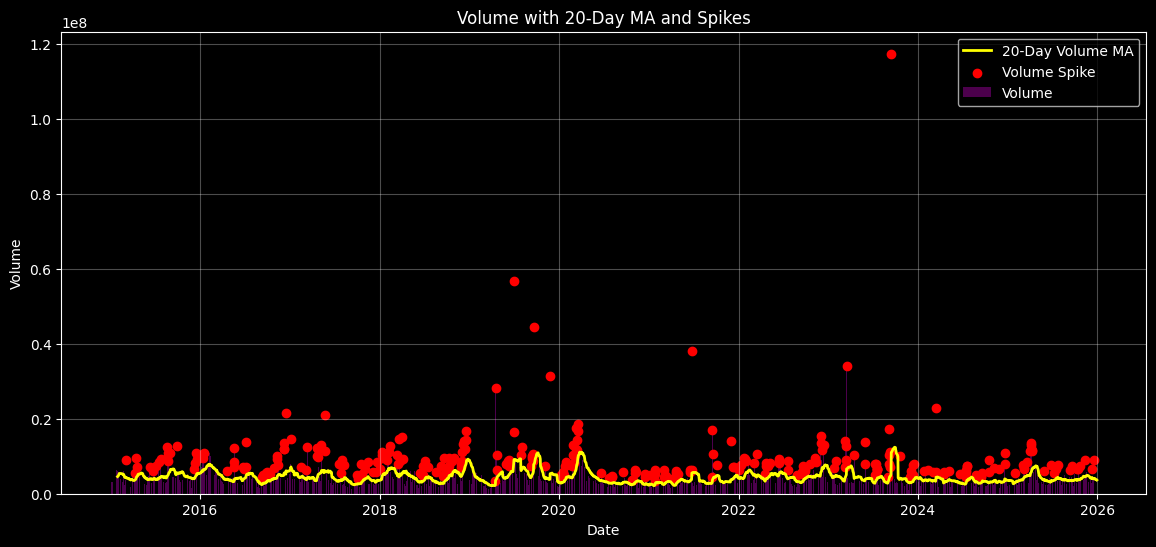

In [36]:
plt.figure(figsize=(14,6))
plt.bar(df['date'], df['volume'], color='purple', alpha=0.6, label='Volume')
plt.plot(df['date'], df['volume_ma_20'], color='yellow', linewidth=2, label='20‑Day Volume MA')

# Highlight spikes
spikes = df[df['volume_spike']]
plt.scatter(spikes['date'], spikes['volume'], color='red', label='Volume Spike')

plt.title("Volume with 20‑Day MA and Spikes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


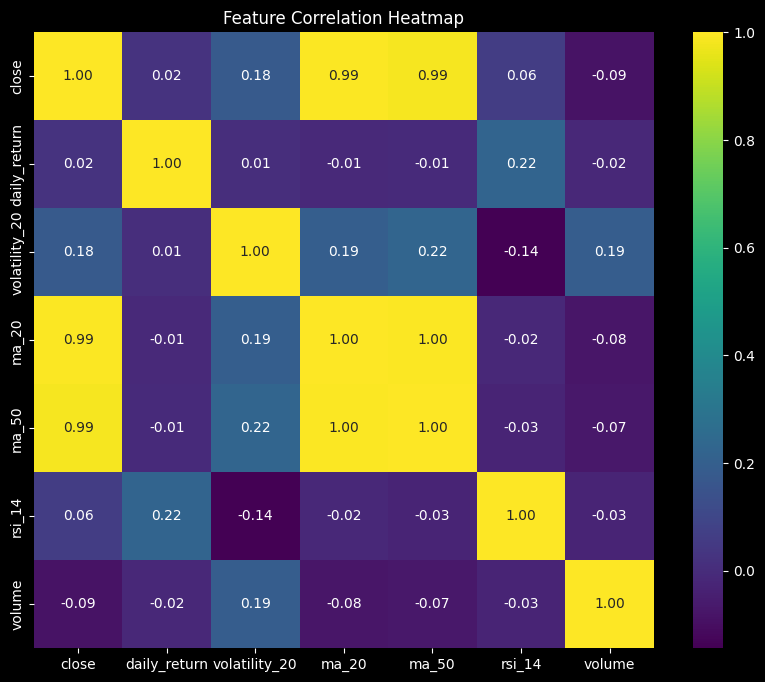

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['close','daily_return','volatility_20','ma_20','ma_50','rsi_14','volume']].corr(),
            annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [38]:
df.head()

,date,open,high,low,close,adjusted_close,volume,daily_return,volatility_20,ma_20,ma_50,rsi_14,volume_ma_20,volume_spike
0,2015-01-02,33.346416,33.631012,33.091267,33.493622,19.624445,2626167.0,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2015-01-05,33.248283,33.424927,32.531895,33.002945,19.336946,3072693.0,-0.014650,NaN,NaN,NaN,NaN,NaN,False
2,2015-01-06,33.081451,33.120708,31.756624,32.365063,18.963203,3417930.0,-0.019328,NaN,NaN,NaN,NaN,NaN,False
3,2015-01-07,32.679096,33.022572,32.384689,32.826302,19.233456,2565231.0,0.014251,NaN,NaN,NaN,NaN,NaN,False
4,2015-01-08,33.169773,33.287537,32.983318,33.081451,19.382940,3589937.0,0.007773,NaN,NaN,NaN,NaN,NaN,False


In [39]:
output_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\fortune_500_stock_data\Blackstone_cleaned.csv"
df.to_csv(output_path, index=False)


In [40]:
first_30 = df.head(30)

output_path_30 = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\fortune_500_stock_data\Blackstone_first_30_rows.csv"
first_30.to_csv(output_path_30, index=False)
